In [2]:
import os
import pandas as pd
from config_file import data_path

path = os.path.join(data_path, "sessions.jsonl")
df = pd.read_json(path, orient="records", lines=True)

In [3]:
df.head()

,timestamp,user_id,track_id,event_type,session_id
0,2023-11-07 04:12:46.175410,NaN,None,play,124
1,2023-11-07 04:17:30.308410,101.0,None,advertisement,124
2,2023-11-07 04:17:46.308410,101.0,None,None,124
3,2023-11-07 04:18:05.308410,101.0,None,None,124
4,2023-11-07 04:18:56.567939,101.0,7fZrNlR5JAW6iGW0YJj54g,play,125


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77907 entries, 0 to 77906
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   77907 non-null  datetime64[ns]
 1   user_id     62446 non-null  float64       
 2   track_id    62234 non-null  object        
 3   event_type  62493 non-null  object        
 4   session_id  77907 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.0+ MB


In [6]:
df.describe()

,timestamp,user_id,session_id
count,77907,62446.000000,77907.000000
mean,2023-08-09 14:10:36.259038208,123.696105,6554.397538
min,2023-01-02 01:13:52.744708,101.000000,124.000000
25%,2023-06-17 08:48:25.871105024,111.000000,3309.000000
50%,2023-08-25 10:52:54.598779904,124.000000,6559.000000
75%,2023-10-14 07:08:26.018503936,136.000000,9797.000000
max,2023-11-26 23:57:02.573605,150.000000,12991.000000
std,NaN,14.225628,3718.716857


In [7]:
from matplotlib import pyplot as plt
def plot_hist(df, col):
    col_info = [df[col].notnull().sum(), df[col].isnull().sum()]
    print(f"not null: {col_info[0]}, null: {col_info[1]}")
    plt.bar(["not null", "null"], col_info)
    for i, v in enumerate(col_info):
        plt.text(i, v, str(v), color="blue", fontweight="bold")
    plt.title(col)
    plt.show()

In [13]:
df_play = df[df["event_type"]=="play"]
df_play = df_play[["timestamp", "track_id"]]
df_play.head()

,timestamp,track_id
0,2023-11-07 04:12:46.175410,None
4,2023-11-07 04:18:56.567939,7fZrNlR5JAW6iGW0YJj54g
6,2023-11-07 04:20:14.595939,1zLDoWZouIhWZLEBEpTJqV
7,2023-11-07 04:22:50.848939,6pXeqWsXc6r3O1JanHujuX
8,2023-11-07 04:27:30.504939,5kkOyblSB4fHMNiTC69a5t


not null: 30540, null: 7540


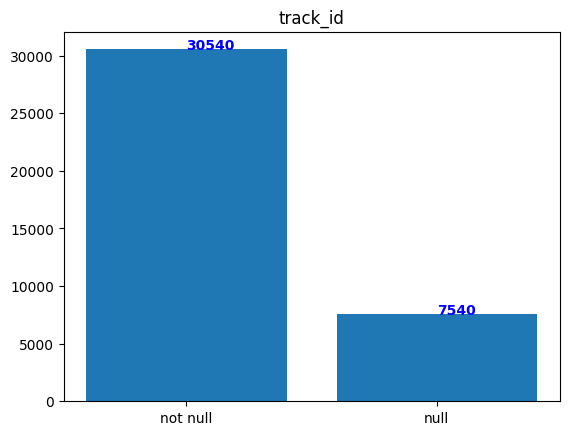

In [14]:
plot_hist(df_play, "track_id")

In [22]:
df_play = df_play[df_play["track_id"].notnull()]

In [23]:
df_play["timestamp"].min(), df_play["timestamp"].max()

(Timestamp('2023-01-02 01:19:13.277708'),
 Timestamp('2023-11-26 23:49:21.333605'))

In [24]:

df_play["month"] = df_play["timestamp"].dt.month
df_play["week"] = df_play["timestamp"].dt.dayofyear // 7
df_play.head()

,timestamp,track_id,month,week
4,2023-11-07 04:18:56.567939,7fZrNlR5JAW6iGW0YJj54g,11,44
6,2023-11-07 04:20:14.595939,1zLDoWZouIhWZLEBEpTJqV,11,44
7,2023-11-07 04:22:50.848939,6pXeqWsXc6r3O1JanHujuX,11,44
8,2023-11-07 04:27:30.504939,5kkOyblSB4fHMNiTC69a5t,11,44
9,2023-11-07 04:32:27.437939,4qVR3CF8FuFvHN4L6vXlB1,11,44


<Axes: xlabel='month'>

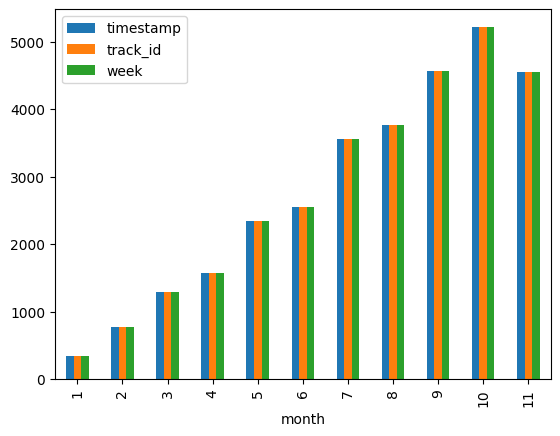

In [26]:
# make plot how many tracks played in each month
df_play.groupby("month").count().plot.bar()

<Axes: xlabel='week'>

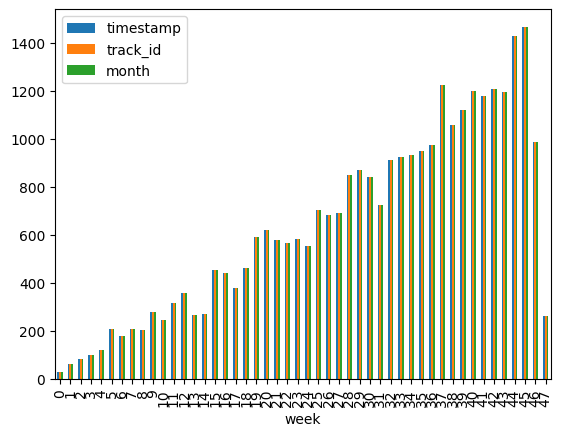

In [27]:
# make plot how many tracks played in each week
df_play.groupby("week").count().plot.bar()

#### sum up
- nulls in track id
- is period long enough